In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Train Set.csv', encoding='ISO-8859-1', sep=';')

In [5]:
df.isnull().sum()

ID                                          0
time                                        0
temperature_2m (EEC)                   8021
relative_humidity_2m (%)                 1759
dew_point_2m (EEC)                        0
apparent_temperature (EEC)                0
precipitation (mm)                       3542
pressure_msl (hPa)                          0
surface_pressure (hPa)                   1814
cloud_cover (%)                          4351
cloud_cover_low (%)                      3541
cloud_cover_mid (%)                      2624
cloud_cover_high (%)                        0
vapour_pressure_deficit (kPa)            1784
wind_speed_10m (km/h)                    3492
wind_speed_100m (km/h)                      0
wind_direction_10m (EE)                1699
wind_direction_100m (EE)               1796
wind_gusts_10m (km/h)                    2604
soil_temperature_0_to_7cm (EEC)           0
soil_temperature_7_to_28cm (EEC)          0
soil_temperature_28_to_100cm (EE

In [6]:
df.columns

Index(['ID', 'time', 'temperature_2m (EEC)', 'relative_humidity_2m (%)',
       'dew_point_2m (EEC)', 'apparent_temperature (EEC)',
       'precipitation (mm)', 'pressure_msl (hPa)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)',
       'cloud_cover_high (%)', 'vapour_pressure_deficit (kPa)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_direction_10m (EE)', 'wind_direction_100m (EE)',
       'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (EEC)',
       'soil_temperature_7_to_28cm (EEC)',
       'soil_temperature_28_to_100cm (EEC)',
       'soil_temperature_100_to_255cm (EEC)',
       'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
       'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'shortwave_radiation (W/m?)',
       'direct_radiation (W/m?)', 'diffuse_radiation (W/m?)',
       'direct_normal_irradiance (W/m?)', 'global_tilted_ir

In [7]:
df.dropna(subset= ['electricity_shutdown', 'precipitation (mm)'],inplace=True)

In [8]:
df.shape

(11163, 36)

In [9]:
df.isnull().sum()

ID                                          0
time                                        0
temperature_2m (EEC)                   5080
relative_humidity_2m (%)                 1106
dew_point_2m (EEC)                        0
apparent_temperature (EEC)                0
precipitation (mm)                          0
pressure_msl (hPa)                          0
surface_pressure (hPa)                   1186
cloud_cover (%)                          2773
cloud_cover_low (%)                      2186
cloud_cover_mid (%)                      1669
cloud_cover_high (%)                        0
vapour_pressure_deficit (kPa)            1135
wind_speed_10m (km/h)                    2237
wind_speed_100m (km/h)                      0
wind_direction_10m (EE)                1056
wind_direction_100m (EE)               1120
wind_gusts_10m (km/h)                    1611
soil_temperature_0_to_7cm (EEC)           0
soil_temperature_7_to_28cm (EEC)          0
soil_temperature_28_to_100cm (EE

In [10]:

df["time"] = pd.to_datetime(df["time"])
df.replace(',','.', regex=True, inplace=True)
df.rename(columns={'temperature_2m (EEC)': 'temperature', 'dew_point_2m (EEC)' : 'dew_point', 'apparent_temperature (EEC)' :
                   'apparent_temperature', 'wind_direction_10m (EE)' : 'wind_direction_10m', 'wind_direction_100m (EE)' :
                   'wind_direction_100m', 'soil_temperature_0_to_7cm (EEC)' : 'soil_temperature_0_to_7cm',
                   'soil_temperature_7_to_28cm (EEC)' : 'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm (EEC)' :
                   'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm (EEC)' : 'soil_temperature_100_to_255cm'}, inplace=True)

In [11]:
for_cols = df.drop(['time', 'precipitation (mm)', 'electricity_shutdown'], axis=1)
cols = for_cols.columns

for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())
var = df.columns.values
var = np.delete(var,np.where(var=="electricity_shutdown"))
var = np.delete(var,np.where(var=="ID"))
var = np.delete(var, np.where(var == "time"))
for feature in var:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

print(df.dtypes)

ID                                             int64
time                                  datetime64[ns]
temperature                                  float64
relative_humidity_2m (%)                     float64
dew_point                                    float64
apparent_temperature                         float64
precipitation (mm)                           float64
pressure_msl (hPa)                           float64
surface_pressure (hPa)                       float64
cloud_cover (%)                              float64
cloud_cover_low (%)                          float64
cloud_cover_mid (%)                          float64
cloud_cover_high (%)                           int64
vapour_pressure_deficit (kPa)                float64
wind_speed_10m (km/h)                        float64
wind_speed_100m (km/h)                       float64
wind_direction_10m                           float64
wind_direction_100m                          float64
wind_gusts_10m (km/h)                        f

In [12]:
df.columns

Index(['ID', 'time', 'temperature', 'relative_humidity_2m (%)', 'dew_point',
       'apparent_temperature', 'precipitation (mm)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m', 'wind_direction_100m',
       'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm (m?/m?)',
       'soil_moisture_7_to_28cm (m?/m?)', 'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'shortwave_radiation (W/m?)',
       'direct_radiation (W/m?)', 'diffuse_radiation (W/m?)',
       'direct_normal_irradiance (W/m?)', 'global_tilted_irradiance (W/m?)',
       'terrestrial_radiation (W/m?)', 'is_day ()', 'sunshine_duration (s)',
  

In [13]:
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day_name()
df['month'] = df['time'].dt.month.apply(lambda x: f'{x:02d}')
df.drop(columns=['global_tilted_irradiance (W/m?)'], inplace=True)
day_dummies = pd.get_dummies(df['day'], prefix='day').astype(int)
hour_dummies = pd.get_dummies(df['hour'], prefix='hour').astype(int)
month_dummies = pd.get_dummies(df['month'], prefix='month').astype(int)
# Join these dummy variables back to the original dataframe
df = df.join(day_dummies).join(hour_dummies).join(month_dummies) #0.16666666666666666
# df = df.join(day_dummies).join(month_dummies) #0.16666666666666666

# df = df.join(hour_dummies).join(month_dummies) #0.0
# df = df.join(day_dummies).join(hour_dummies) #0.16
# df = df.join(day_dummies) #0.16666666666666666
# df = df.join(hour_dummies) #0.0
# df = df.join(month_dummies) #0.08

In [14]:
df.drop(['ID', 'time', 'day', 'month', 'hour'], axis=1, inplace=True)

In [15]:
df.columns

Index(['temperature', 'relative_humidity_2m (%)', 'dew_point',
       'apparent_temperature', 'precipitation (mm)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'vapour_pressure_deficit (kPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m', 'wind_direction_100m',
       'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm (m?/m?)',
       'soil_moisture_7_to_28cm (m?/m?)', 'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'shortwave_radiation (W/m?)',
       'direct_radiation (W/m?)', 'diffuse_radiation (W/m?)',
       'direct_normal_irradiance (W/m?)', 'terrestrial_radiation (W/m?)',
       'is_day ()', 'sunshine_duration (s)', 'electricity_shutdown',
       'day_Friday', 'day_M

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA
scaler = StandardScaler()
pca_df = df[["shortwave_radiation (W/m?)", "sunshine_duration (s)", "terrestrial_radiation (W/m?)", 
                      "direct_normal_irradiance (W/m?)", "diffuse_radiation (W/m?)", "direct_radiation (W/m?)"]]
scaled_pca_df = scaler.fit_transform(pca_df)

pca = PCA(n_components=1)
pca_components = pca.fit_transform(scaled_pca_df)


pca_result_df = pd.DataFrame(pca_components, columns=['PC1'])
df = df.reset_index(drop=True)
pca_result_df = pca_result_df.reset_index(drop=True)
# df = df.join(pca_result_df)
df['PC1'] = pca_result_df['PC1']

df.drop(columns=["shortwave_radiation (W/m?)", "sunshine_duration (s)", "terrestrial_radiation (W/m?)", "direct_normal_irradiance (W/m?)",
                     "diffuse_radiation (W/m?)", "direct_radiation (W/m?)"], inplace=True)


In [17]:
scaler_lagi = StandardScaler()
X_scaled = scaler_lagi.fit_transform(df[['temperature', 'soil_temperature_0_to_7cm', 'apparent_temperature', 
                                                  'vapour_pressure_deficit (kPa)', 'wind_gusts_10m (km/h)']])


# Step 2: Fit PCA
pca3 = PCA(n_components=1)
pca_components3 = pca3.fit_transform(X_scaled)

pca_result3 = pd.DataFrame(pca_components3, columns=['PC2'])
df = df.reset_index(drop=True)
pca_result3 = pca_result3.reset_index(drop=True)
df = df.join(pca_result3)

df.drop(columns=['temperature', 'soil_temperature_0_to_7cm', 'apparent_temperature', 'vapour_pressure_deficit (kPa)', 'wind_gusts_10m (km/h)'], inplace=True)
#df = df.join(pca_result3)


In [18]:
# scaler_lagiabc = StandardScaler()
# X_scaled = scaler_lagiabc.fit_transform(df[['PC1', 'PC2', 'relative_humidity_2m (%)']]) 


# # Step 2: Fit PCA
# pca4 = PCA(n_components=2)
# pca_components4 = pca4.fit_transform(X_scaled)

# pca_result4 = pd.DataFrame(pca_components4, columns=['PC3', 'PC4'])
# df = df.reset_index(drop=True)
# pca_result4 = pca_result4.reset_index(drop=True)
# df = df.join(pca_result4)

# df.drop(columns=['PC1', 'PC2', 'relative_humidity_2m (%)'], inplace=True)

In [19]:
# scaler_lagi2 = StandardScaler()
# X_scaled3 = scaler_lagi2.fit_transform(df[['pressure_msl (hPa)',
#        'surface_pressure (hPa)']])
# pca5 = PCA(n_components=1)
# pca_components5 = pca5.fit_transform(X_scaled3)

# pca_result5 = pd.DataFrame(pca_components5, columns=['PC3'])

# df = df.join(pca_result5)

In [20]:
# scaler_lagi3 = StandardScaler()
# X_scaled5 = scaler_lagi3.fit_transform(filtered_df[['soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm']])
# pca7 = PCA(n_components=3)
# pca_components7 = pca7.fit_transform(X_scaled5)

# # Rename PCA components to avoid overlap
# pca_result7 = pd.DataFrame(pca_components7, columns=['Soil_PC5', 'Soil_PC6', 'Soil_PC7'])

# X_scaled6 = scaler_lagi3.transform(filtered_df2[['soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm']])
# pca_components8 = pca7.transform(X_scaled6)

# # Rename PCA components to avoid overlap
# pca_result8 = pd.DataFrame(pca_components8, columns=['Soil_PC5', 'Soil_PC6', 'Soil_PC7'])

# # Drop original soil temperature columns
# filtered_df.drop(columns=['soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm'], inplace=True)
# filtered_df2.drop(columns=['soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm'], inplace=True)

# # Reset index of PCA results
# pca_result7 = pca_result7.reset_index(drop=True)
# pca_result8 = pca_result8.reset_index(drop=True)

# # Join PCA results with original DataFrames
# filtered_df = filtered_df.join(pca_result7)
# filtered_df2 = filtered_df2.join(pca_result8)

In [21]:
# scaler_lagi4 = StandardScaler()
# X_scaled7 = scaler_lagi4.fit_transform(filtered_df[['wind_speed_10m (km/h)', 'wind_speed_100m (km/h)']])
# pca9 = PCA(n_components=1)
# pca_components9 = pca9.fit_transform(X_scaled7)

# # Rename PCA components to avoid overlap
# pca_result9 = pd.DataFrame(pca_components9, columns=['Wind_PC7'])

# X_scaled8 = scaler_lagi4.transform(filtered_df2[['wind_speed_10m (km/h)', 'wind_speed_100m (km/h)']])
# pca_components10 = pca9.transform(X_scaled8)

# # Rename PCA components to avoid overlap
# pca_result10 = pd.DataFrame(pca_components10, columns=['Wind_PC7'])

# # Drop original wind speed columns
# filtered_df.drop(columns=['wind_speed_10m (km/h)', 'wind_speed_100m (km/h)'], inplace=True)
# filtered_df2.drop(columns=['wind_speed_10m (km/h)', 'wind_speed_100m (km/h)'], inplace=True)

# # Reset index of PCA results
# pca_result9 = pca_result9.reset_index(drop=True)
# pca_result10 = pca_result10.reset_index(drop=True)

# # Join PCA results with original DataFrames
# filtered_df = filtered_df.join(pca_result9)
# filtered_df2 = filtered_df2.join(pca_result10)


In [22]:
# scaler_lagi5 = StandardScaler()
# X_scaled9 = scaler_lagi5.fit_transform(filtered_df[['soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
#        'soil_moisture_28_to_100cm (m?/m?)',
#        'soil_moisture_100_to_255cm (m?/m?)']])
# pca11 = PCA(n_components=1)
# pca_components11 = pca11.fit_transform(X_scaled9)

# # Rename PCA components to avoid overlap
# pca_result11 = pd.DataFrame(pca_components11, columns = ['Soil_Moisture_PC8'])

# X_scaled10 = scaler_lagi5.transform(filtered_df2[['soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
#          'soil_moisture_28_to_100cm (m?/m?)',
#          'soil_moisture_100_to_255cm (m?/m?)']])
# pca_components12 = pca11.transform(X_scaled10)

# # Rename PCA components to avoid overlap
# pca_result12 = pd.DataFrame(pca_components12, columns=['Soil_Moisture_PC8'])

# # Drop original soil moisture columns
# filtered_df.drop(columns=['soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
#        'soil_moisture_28_to_100cm (m?/m?)',
#        'soil_moisture_100_to_255cm (m?/m?)'], inplace=True)
# filtered_df2.drop(columns=['soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
#          'soil_moisture_28_to_100cm (m?/m?)',
#          'soil_moisture_100_to_255cm (m?/m?)'], inplace=True)

# # Reset index of PCA results
# pca_result11 = pca_result11.reset_index(drop=True)
# pca_result12 = pca_result12.reset_index(drop=True)

# # Join PCA results with original DataFrames
# filtered_df = filtered_df.join(pca_result11)
# filtered_df2 = filtered_df2.join(pca_result12)


In [23]:
# from sklearn.decomposition import FactorAnalysis
# from sklearn.preprocessing import StandardScaler

# # Step 1: Standardize the Data
# scaler_lagi2 = StandardScaler()
# X_scaled3 = scaler_lagi2.fit_transform(df[['pressure_msl (hPa)', 'surface_pressure (hPa)']])

# # Step 2: Apply Factor Analysis
# fa = FactorAnalysis(n_components=1)
# fa_components = fa.fit_transform(X_scaled3)

# # Step 3: Create a DataFrame for the Factor Scores
# fa_result = pd.DataFrame(fa_components, columns=['FA1'])

# # Step 4: Join the Factor Scores with the Original DataFrame
# df = df.join(fa_result)
# # Step 7: Drop the Original Columns
# df.drop(columns=['pressure_msl (hPa)', 'surface_pressure (hPa)'], inplace=True)

In [24]:
# from sklearn.preprocessing import KBinsDiscretizer
# import pandas as pd

# # Create the KBinsDiscretizer objects
# discretizer1 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')


# # Fit the discretizer to the data
# discretizer1.fit(df[['PC3']]) #, 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'

# # Transform the data using the fitted discretizer
# discretized_data = discretizer1.transform(df[['PC3']]) #, 'PC4', 'Soil_PC5', 'Soil_PC6', 'Wind_PC7', 'Soil_Moisture_PC8', 'Soil_Moisture_PC9', 'Soil_Moisture_PC10'

# # Convert the transformed data to DataFrames
# discretized_df = pd.DataFrame(discretized_data, columns=['PC3_binned']) #, 'PC4_binned', 'Soil_PC5_binned', 'Soil_PC6_binned', 'Wind_PC7_binned', 'Soil_Moisture_PC8_binned', 'Soil_Moisture_PC9_binned', 'Soil_Moisture_PC10_binned'

# # Replace the original 'PC1' column with the binned data
# df['PC3'] = discretized_df['PC3_binned']
# # df['PC1'] = discretized_df['PC1_binned']
# # df['PC3'] = discretized_df['PC3_binned']
# # df['FA1'] = discretized_df['FA1_binned']
# # df['PC4'] = discretized_df['PC4_binned']
# # df['Soil_PC5'] = discretized_df['Soil_PC5_binned']
# # df['Soil_PC6'] = discretized_df['Soil_PC6_binned']
# # df['Wind_PC7'] = discretized_df['Wind_PC7_binned']
# # df['Soil_Moisture_PC8'] = discretized_df['Soil_Moisture_PC8_binned']
# # df['Soil_Moisture_PC9'] = discretized_df['Soil_Moisture_PC9_binned']
# # df['Soil_Moisture_PC10'] = discretized_df['Soil_Moisture_PC10_binned']

In [25]:
# scaler_lagi3 = StandardScaler()
# X_scaled5 = scaler_lagi3.fit_transform(df[['soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm']])
# pca7 = PCA(n_components=2)
# pca_components7 = pca7.fit_transform(X_scaled5)

# # Rename PCA components to avoid overlap
# pca_result7 = pd.DataFrame(pca_components7, columns=['Soil_PC5', 'Soil_PC6'])


# # Rename PCA components to avoid overlap


# # Drop original soil temperature columns
# df.drop(columns=['soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm'], inplace=True)


# # Reset index of PCA results
# pca_result7 = pca_result7.reset_index(drop=True)


# # Join PCA results with original DataFrames
# df = df.join(pca_result7)


In [26]:
df.isnull().sum()

relative_humidity_2m (%)    0
dew_point                   0
precipitation (mm)          0
pressure_msl (hPa)          0
surface_pressure (hPa)      0
                           ..
month_10                    0
month_11                    0
month_12                    0
PC1                         0
PC2                         0
Length: 67, dtype: int64

In [27]:
# from sklearn.model_selection import train_test_split
# X = df.drop(columns=['precipitation (mm)', 'electricity_shutdown'])
# y = df['electricity_shutdown']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['precipitation (mm)', 'electricity_shutdown'])
y = df['electricity_shutdown']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42, sampling_strategy='minority')

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the balance of the classes after SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_smote.value_counts())

Class distribution before SMOTE: 0.0    7730
1.0      84
Name: electricity_shutdown, dtype: int64
Class distribution after SMOTE: 0.0    7730
1.0    7730
Name: electricity_shutdown, dtype: int64


In [1692]:
# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(random_state=42)
# X = df.drop(columns=['precipitation (mm)', 'electricity_shutdown'])
# y = df['electricity_shutdown']
# X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)


In [1693]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [1694]:
# from imblearn.over_sampling import BorderlineSMOTE
# bsmote = BorderlineSMOTE(random_state=42)
# X_resampled, y_resampled = bsmote.fit_resample(X_train, y_train)


In [1695]:
# from imblearn.over_sampling import SVMSMOTE
# svm_smote = SVMSMOTE(random_state=42)
# X_resampled, y_resampled = svm_smote.fit_resample(X_train, y_train)


In [1696]:
# from imblearn.over_sampling import KMeansSMOTE
# kmeans_smote = KMeansSMOTE(random_state=42)
# X_resampled, y_resampled = kmeans_smote.fit_resample(X_train, y_train)


In [1697]:
# # smotenc, fill all day, hour, and month columns as categorical
# from imblearn.over_sampling import SMOTENC
# smotenc = SMOTENC(random_state=42, categorical_features=[X_train.columns.get_loc('day_Friday'), X_train.columns.get_loc('day_Monday'),
#                                                          X_train.columns.get_loc('day_Saturday'), X_train.columns.get_loc('day_Sunday'),
#                                                          X_train.columns.get_loc('day_Thursday'), X_train.columns.get_loc('day_Tuesday'),
#                                                          X_train.columns.get_loc('day_Wednesday'), X_train.columns.get_loc('hour_0'),
#                                                          X_train.columns.get_loc('hour_1'), X_train.columns.get_loc('hour_2'),
#                                                          X_train.columns.get_loc('hour_3'), X_train.columns.get_loc('hour_4'),
#                                                          X_train.columns.get_loc('hour_5'), X_train.columns.get_loc('hour_6'),
#                                                          X_train.columns.get_loc('hour_7'), X_train.columns.get_loc('hour_8'),
#                                                          X_train.columns.get_loc('hour_9'), X_train.columns.get_loc('hour_10'),
#                                                          X_train.columns.get_loc('hour_11'), X_train.columns.get_loc('hour_12'),
#                                                          X_train.columns.get_loc('hour_13'), X_train.columns.get_loc('hour_14'),
#                                                          X_train.columns.get_loc('hour_15'), X_train.columns.get_loc('hour_16'),
#                                                          X_train.columns.get_loc('hour_17'), X_train.columns.get_loc('hour_18'),
#                                                          X_train.columns.get_loc('hour_19'), X_train.columns.get_loc('hour_20'),
#                                                          X_train.columns.get_loc('hour_21'), X_train.columns.get_loc('hour_22'),
#                                                          X_train.columns.get_loc('hour_23'), X_train.columns.get_loc('month_01'),
#                                                          X_train.columns.get_loc('month_02'), X_train.columns.get_loc('month_03'),
#                                                          X_train.columns.get_loc('month_04'), X_train.columns.get_loc('month_05'),
#                                                          X_train.columns.get_loc('month_06'), X_train.columns.get_loc('month_07'),
#                                                          X_train.columns.get_loc('month_08'), X_train.columns.get_loc('month_09'),
#                                                          X_train.columns.get_loc('month_10'), X_train.columns.get_loc('month_11'),
#                                                          X_train.columns.get_loc('month_12')])
# X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)



In [1698]:
df.columns

Index(['relative_humidity_2m (%)', 'dew_point', 'precipitation (mm)',
       'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)',
       'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)',
       'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_direction_10m',
       'wind_direction_100m', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)',
       'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)', 'is_day ()',
       'electricity_shutdown', 'day_Friday', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_2

In [30]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score

columns_to_scale = ['relative_humidity_2m (%)', 'dew_point',
        'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)',
       'cloud_cover_mid (%)', 'cloud_cover_high (%)',
        'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m', 'wind_direction_100m',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm (m?/m?)',
       'soil_moisture_7_to_28cm (m?/m?)', 'soil_moisture_28_to_100cm (m?/m?)',
       'soil_moisture_100_to_255cm (m?/m?)']
# Scaling the data
scaler2 = StandardScaler()
scaler2.fit(X_train_smote[columns_to_scale])

X_train_smote[columns_to_scale] = scaler2.transform(X_train_smote[columns_to_scale])
X_test[columns_to_scale] = scaler2.transform(X_test[columns_to_scale])

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


[[3328    2]
 [  16    3]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3330
         1.0       0.60      0.16      0.25        19

    accuracy                           0.99      3349
   macro avg       0.80      0.58      0.62      3349
weighted avg       0.99      0.99      0.99      3349

0.9946252612720214
0.25


In [32]:
#model with catboost
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(random_state=42)
cat_model.fit(X_train_smote, y_train_smote)

y_pred = cat_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

Learning rate set to 0.033169
0:	learn: 0.6721525	total: 160ms	remaining: 2m 40s
1:	learn: 0.6513453	total: 178ms	remaining: 1m 28s
2:	learn: 0.6360247	total: 191ms	remaining: 1m 3s
3:	learn: 0.6189550	total: 207ms	remaining: 51.6s
4:	learn: 0.6025364	total: 240ms	remaining: 47.7s
5:	learn: 0.5850496	total: 271ms	remaining: 44.9s
6:	learn: 0.5712183	total: 300ms	remaining: 42.6s
7:	learn: 0.5545294	total: 322ms	remaining: 39.9s
8:	learn: 0.5394573	total: 338ms	remaining: 37.3s
9:	learn: 0.5248269	total: 353ms	remaining: 34.9s
10:	learn: 0.5127078	total: 367ms	remaining: 33s
11:	learn: 0.5004631	total: 380ms	remaining: 31.3s
12:	learn: 0.4875315	total: 393ms	remaining: 29.8s
13:	learn: 0.4755506	total: 408ms	remaining: 28.7s
14:	learn: 0.4646625	total: 427ms	remaining: 28s
15:	learn: 0.4527925	total: 441ms	remaining: 27.1s
16:	learn: 0.4434543	total: 457ms	remaining: 26.5s
17:	learn: 0.4332232	total: 468ms	remaining: 25.6s
18:	learn: 0.4249256	total: 483ms	remaining: 24.9s
19:	learn: 0.

In [1701]:
#model with lightgbm
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_smote, y_train_smote)

y_pred = lgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7730, number of negative: 7730
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5286
[LightGBM] [Info] Number of data points in the train set: 15460, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[3328    2]
 [  17    2]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3330
         1.0       0.50      0.11      0.17        19

    accuracy                           0.99      3349
   macro avg       0.75      0.55      0.59      3349
weighted avg       0.99      0.99      0.99      3349

0.9943266646760227
0.17391304347826086


In [1702]:
#model with gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)

y_pred = gb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[3307   23]
 [  17    2]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3330
         1.0       0.08      0.11      0.09        19

    accuracy                           0.99      3349
   macro avg       0.54      0.55      0.54      3349
weighted avg       0.99      0.99      0.99      3349

0.9880561361600477
0.09090909090909091


In [ ]:
print(len(X_train.columns))

33


Optimal number of features: 58
Best features: ['relative_humidity_2m (%)', 'dew_point', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'cloud_cover_high (%)', 'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_direction_10m', 'wind_direction_100m', 'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)', 'soil_moisture_28_to_100cm (m?/m?)', 'soil_moisture_100_to_255cm (m?/m?)', 'is_day ()', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'hour_1', 'hour_2', 'hour_3', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_20', 'hour_21', 'hour_22', 'month_01', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_

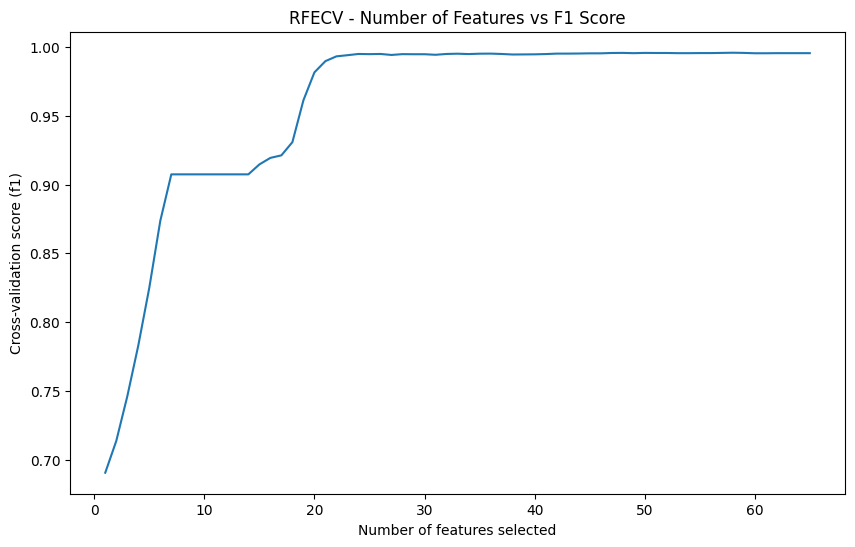

In [1247]:
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define the model
model = XGBClassifier(objective="binary:logistic", random_state=42)

# Recursive Feature Elimination with Cross-Validation
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='f1', n_jobs=-1)

# Fit the model
rfecv.fit(X_train_smote, y_train_smote)

# Best features
best_features = X_train.columns[rfecv.support_]
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Best features: {list(best_features)}")

# Plot the number of features vs. cross-validation score
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (f1)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title("RFECV - Number of Features vs F1 Score")
plt.show()




In [1254]:
#rfecv
X_train_smote_rfecv = rfecv.transform(X_train_smote)
X_test_rfecv = rfecv.transform(X_test)

xgb_model_rfecv = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model_rfecv.fit(X_train_smote_rfecv, y_train_smote)

y_pred_rfecv = xgb_model_rfecv.predict(X_test_rfecv)
print(confusion_matrix(y_test, y_pred_rfecv))
print(classification_report(y_test, y_pred_rfecv))

[[3328    2]
 [  17    2]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3330
         1.0       0.50      0.11      0.17        19

    accuracy                           0.99      3349
   macro avg       0.75      0.55      0.59      3349
weighted avg       0.99      0.99      0.99      3349



In [1248]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

model = XGBClassifier(objective="binary:logistic", random_state=42)

sfs = SFS(model,
          k_features="best",
          forward=True,  # Use False for backward elimination
          floating=False,
          scoring=make_scorer(f1_score),
          cv=5,
          n_jobs=-1)

# Fit SFS
sfs = sfs.fit(X_train_smote, y_train_smote)

# Best features
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
print(f"Selected features: {list(selected_features)}")

# Performance score
print(f"CV Score: {sfs.k_score_}")


Selected features: ['relative_humidity_2m (%)', 'dew_point', 'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_mid (%)', 'wind_speed_10m (km/h)', 'wind_direction_10m', 'wind_direction_100m', 'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm', 'soil_moisture_7_to_28cm (m?/m?)', 'soil_moisture_28_to_100cm (m?/m?)', 'hour_6', 'hour_15', 'month_05']
CV Score: 0.9971339102261012


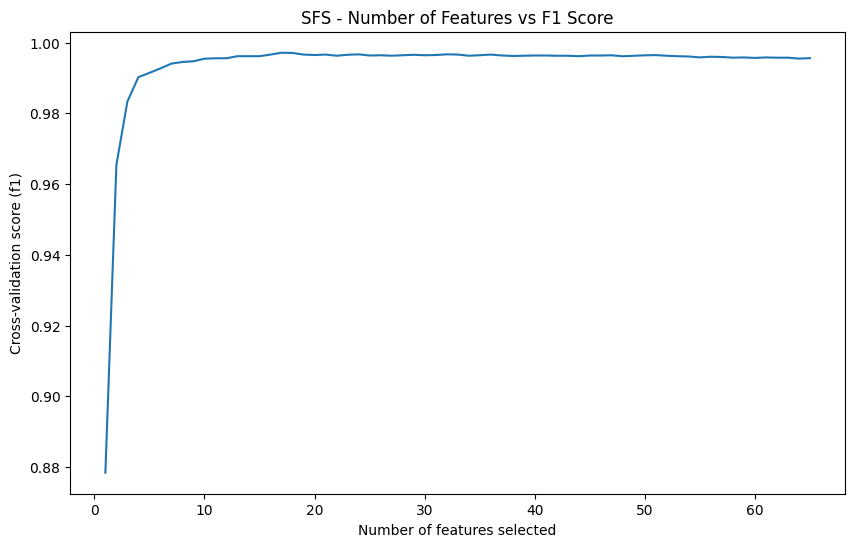

[[3322    8]
 [  19    0]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3330
         1.0       0.00      0.00      0.00        19

    accuracy                           0.99      3349
   macro avg       0.50      0.50      0.50      3349
weighted avg       0.99      0.99      0.99      3349



In [1253]:
#sfs

# Plot the number of features vs. cross-validation score
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (f1)")
plt.plot(range(1, len(sfs.subsets_) + 1), [sfs.subsets_[k]['avg_score'] for k in sfs.subsets_])
plt.title("SFS - Number of Features vs F1 Score")
plt.show()

# Select the best features
X_train_sfs = sfs.transform(X_train_smote)
X_test_sfs = sfs.transform(X_test)

# Fit the model
model.fit(X_train_sfs, y_train_smote)

# Predict
y_pred = model.predict(X_test_sfs)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [1249]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

lasso = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train_smote)

# Get selected features
selected_features = X_train.columns[(lasso.coef_ != 0)]
print(f"Selected features: {list(selected_features)}")

# Evaluate on the test set
y_pred = lasso.predict(X_test_scaled)
print(f"F1 score: {f1_score(y_test, y_pred.round())}")


Selected features: ['relative_humidity_2m (%)', 'dew_point', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)', 'cloud_cover_high (%)', 'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)', 'wind_direction_10m', 'wind_direction_100m', 'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm (m?/m?)', 'soil_moisture_7_to_28cm (m?/m?)', 'soil_moisture_28_to_100cm (m?/m?)', 'soil_moisture_100_to_255cm (m?/m?)', 'is_day ()', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_01', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09', 'month_10

In [1250]:
from boruta import BorutaPy
from xgboost import XGBClassifier

model = XGBClassifier(objective="binary:logistic", random_state=42)
boruta_selector = BorutaPy(model, n_estimators='auto', random_state=42, verbose=2)

# Fit Boruta
boruta_selector.fit(X_train_smote.values, y_train_smote.values)

# Selected features
selected_features = X_train.columns[boruta_selector.support_]
print(f"Selected features: {list(selected_features)}")


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	65
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	31
Tentative: 	28
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	31
Tentative: 	28
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	31
Tentative: 	28
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	31
Tentative: 	28
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	46
Tentative: 	13
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	46
Tentative: 	13
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	46
Tentative: 	13
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	46
Tentative: 	12
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	47
Tentative: 	11
Rejec

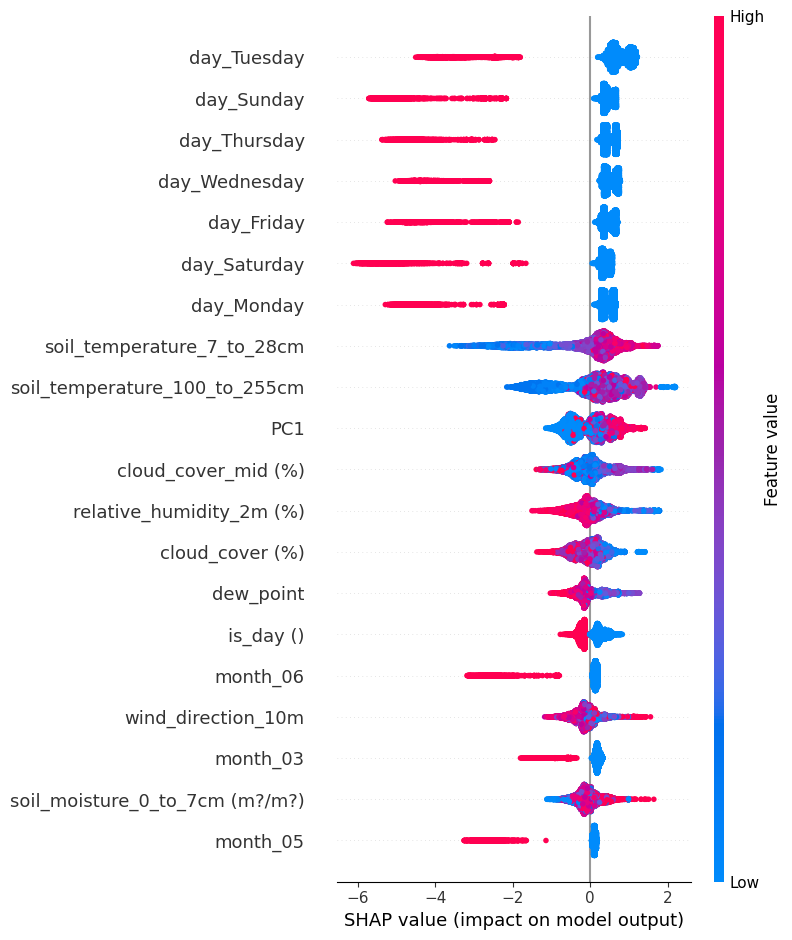

Top features: ['day_Tuesday', 'day_Sunday', 'day_Thursday', 'day_Wednesday', 'day_Friday', 'day_Saturday', 'day_Monday', 'soil_temperature_7_to_28cm', 'soil_temperature_100_to_255cm', 'PC1', 'cloud_cover_mid (%)', 'relative_humidity_2m (%)', 'cloud_cover (%)', 'dew_point', 'is_day ()', 'month_06', 'wind_direction_10m', 'month_03', 'soil_moisture_0_to_7cm (m?/m?)', 'month_05', 'cloud_cover_high (%)', 'wind_direction_100m', 'surface_pressure (hPa)', 'month_04', 'soil_temperature_28_to_100cm', 'soil_moisture_100_to_255cm (m?/m?)', 'month_07', 'month_01', 'soil_moisture_7_to_28cm (m?/m?)', 'cloud_cover_low (%)', 'wind_speed_100m (km/h)', 'pressure_msl (hPa)', 'month_02', 'wind_speed_10m (km/h)', 'PC2', 'soil_moisture_28_to_100cm (m?/m?)', 'month_11', 'month_12', 'month_08', 'hour_17', 'month_09', 'hour_18', 'hour_12', 'month_10', 'hour_16', 'hour_14', 'hour_15', 'hour_13', 'hour_22', 'hour_11', 'hour_9', 'hour_2', 'hour_8', 'hour_3', 'hour_1', 'hour_0', 'hour_23', 'hour_20', 'hour_10', 'ho

In [1251]:
import shap

model = XGBClassifier(objective="binary:logistic", random_state=42)
model.fit(X_train_smote, y_train_smote)

explainer = shap.Explainer(model)
shap_values = explainer(X_train_smote)

# Plot SHAP summary
shap.summary_plot(shap_values, X_train_smote)

# Feature importance ranking
shap_importance = np.abs(shap_values.values).mean(axis=0)
important_features = X_train.columns[np.argsort(-shap_importance)]
print(f"Top features: {list(important_features)}")


In [ ]:
len(X_train_smote.columns)

65

In [ ]:
#bayes search for xgb
from skopt import BayesSearchCV
from xgboost import XGBClassifier

opt = BayesSearchCV(
    XGBClassifier(
        n_jobs=-1,
        objective='binary:logistic',
        eval_metric='logloss',
        scoring='f1',
        random_state=42
    ),
    {
        'n_estimators': (50, 1000),
        'max_depth': (1, 10),
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'subsample': (0.5, 1.0),
        'colsample_bytree': (0.5, 1.0),
        'gamma': (0, 5),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'reg_lambda': (1e-9, 1.0, 'log-uniform'),
        'min_child_weight': (0, 5),
    },
    n_iter=32,
    cv=3,
    n_jobs=-1,
    verbose=0,
    random_state=42
)

opt.fit(X_train_smote, y_train_smote)


print(f'Best Parameters: {opt.best_params_}')
print(f'Best F1 Score: {opt.best_score_}')
print(f'Best Estimator: {opt.best_estimator_}')

# Predict on the test set
y_pred = opt.predict(X_test)

# Optionally, you can also compute additional metrics if needed
from sklearn.metrics import f1_score
print(f'F1 Score on Test Set: {f1_score(y_test, y_pred)}')


c:\Users\farel\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [16:29:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scoring" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: OrderedDict([('colsample_bytree', 0.5001190391204204), ('gamma', 2), ('learning_rate', 0.29570652909321354), ('max_depth', 8), ('min_child_weight', 2), ('n_estimators', 820), ('reg_alpha', 0.022849688661519617), ('reg_lambda', 6.126067601262257e-05), ('subsample', 0.7386935753975282)])
Best F1 Score: 0.9954726338973724
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5001190391204204, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.29570652909321354,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=2, missing=nan, monot

In [ ]:
#bayes search for knn
from sklearn.neighbors import KNeighborsClassifier

opt = BayesSearchCV(
    KNeighborsClassifier(),
    {
        'n_neighbors': (1, 100),
        'weights': ['uniform', 'distance'],
        'p': (1, 5),
    },
    n_iter=32,
    cv=3,
    n_jobs=-1,
    verbose=0,
    scoring='f1',
    random_state=42
)

opt.fit(X_train_smote, y_train_smote)


print(f'Best Parameters: {opt.best_params_}')
print(f'Best F1 Score: {opt.best_score_}')
print(f'Best Estimator: {opt.best_estimator_}')

# Predict on the test set
y_pred = opt.predict(X_test)

# Optionally, you can also compute additional metrics if needed
from sklearn.metrics import f1_score
print(f'F1 Score on Test Set: {f1_score(y_test, y_pred)}')

c:\Users\farel\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1, 'distance'] before, using random point [90, 2, 'distance']
  warnings.warn(
c:\Users\farel\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1, 'distance'] before, using random point [30, 1, 'distance']
  warnings.warn(
c:\Users\farel\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1, 'distance'] before, using random point [73, 3, 'distance']
  warnings.warn(
c:\Users\farel\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1, 'distance'] before, using random point [45, 5, 'uniform']
  warnings.warn(
c:\Users\farel\AppDat

Best Parameters: OrderedDict([('n_neighbors', 1), ('p', 1), ('weights', 'uniform')])
Best F1 Score: 0.9739836242306371
Best Estimator: KNeighborsClassifier(n_neighbors=1, p=1)
F1 Score on Test Set: 0.09090909090909091


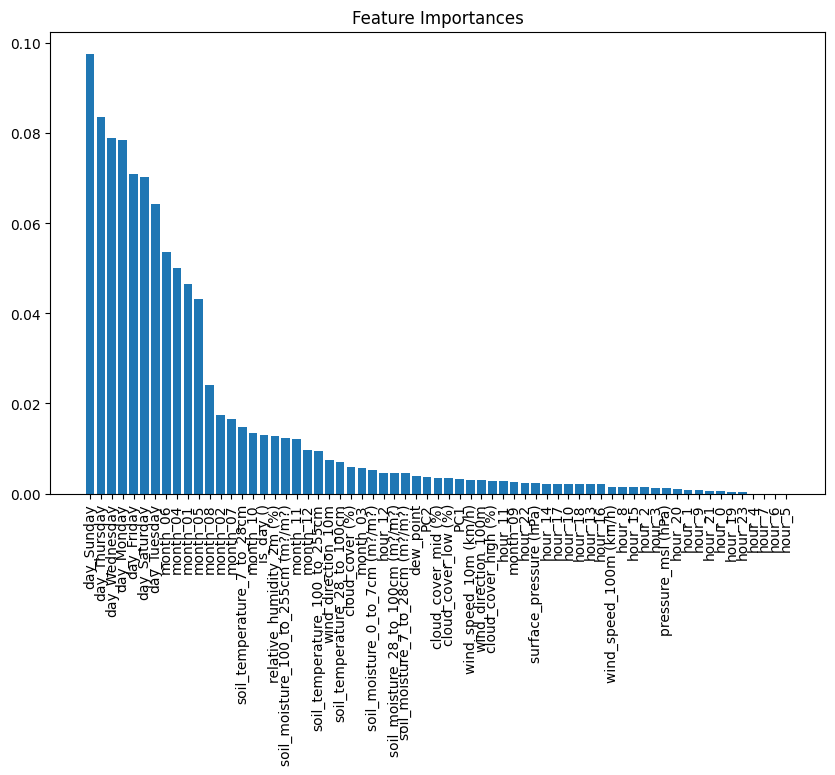

In [ ]:
import matplotlib.pyplot as plt
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.show()


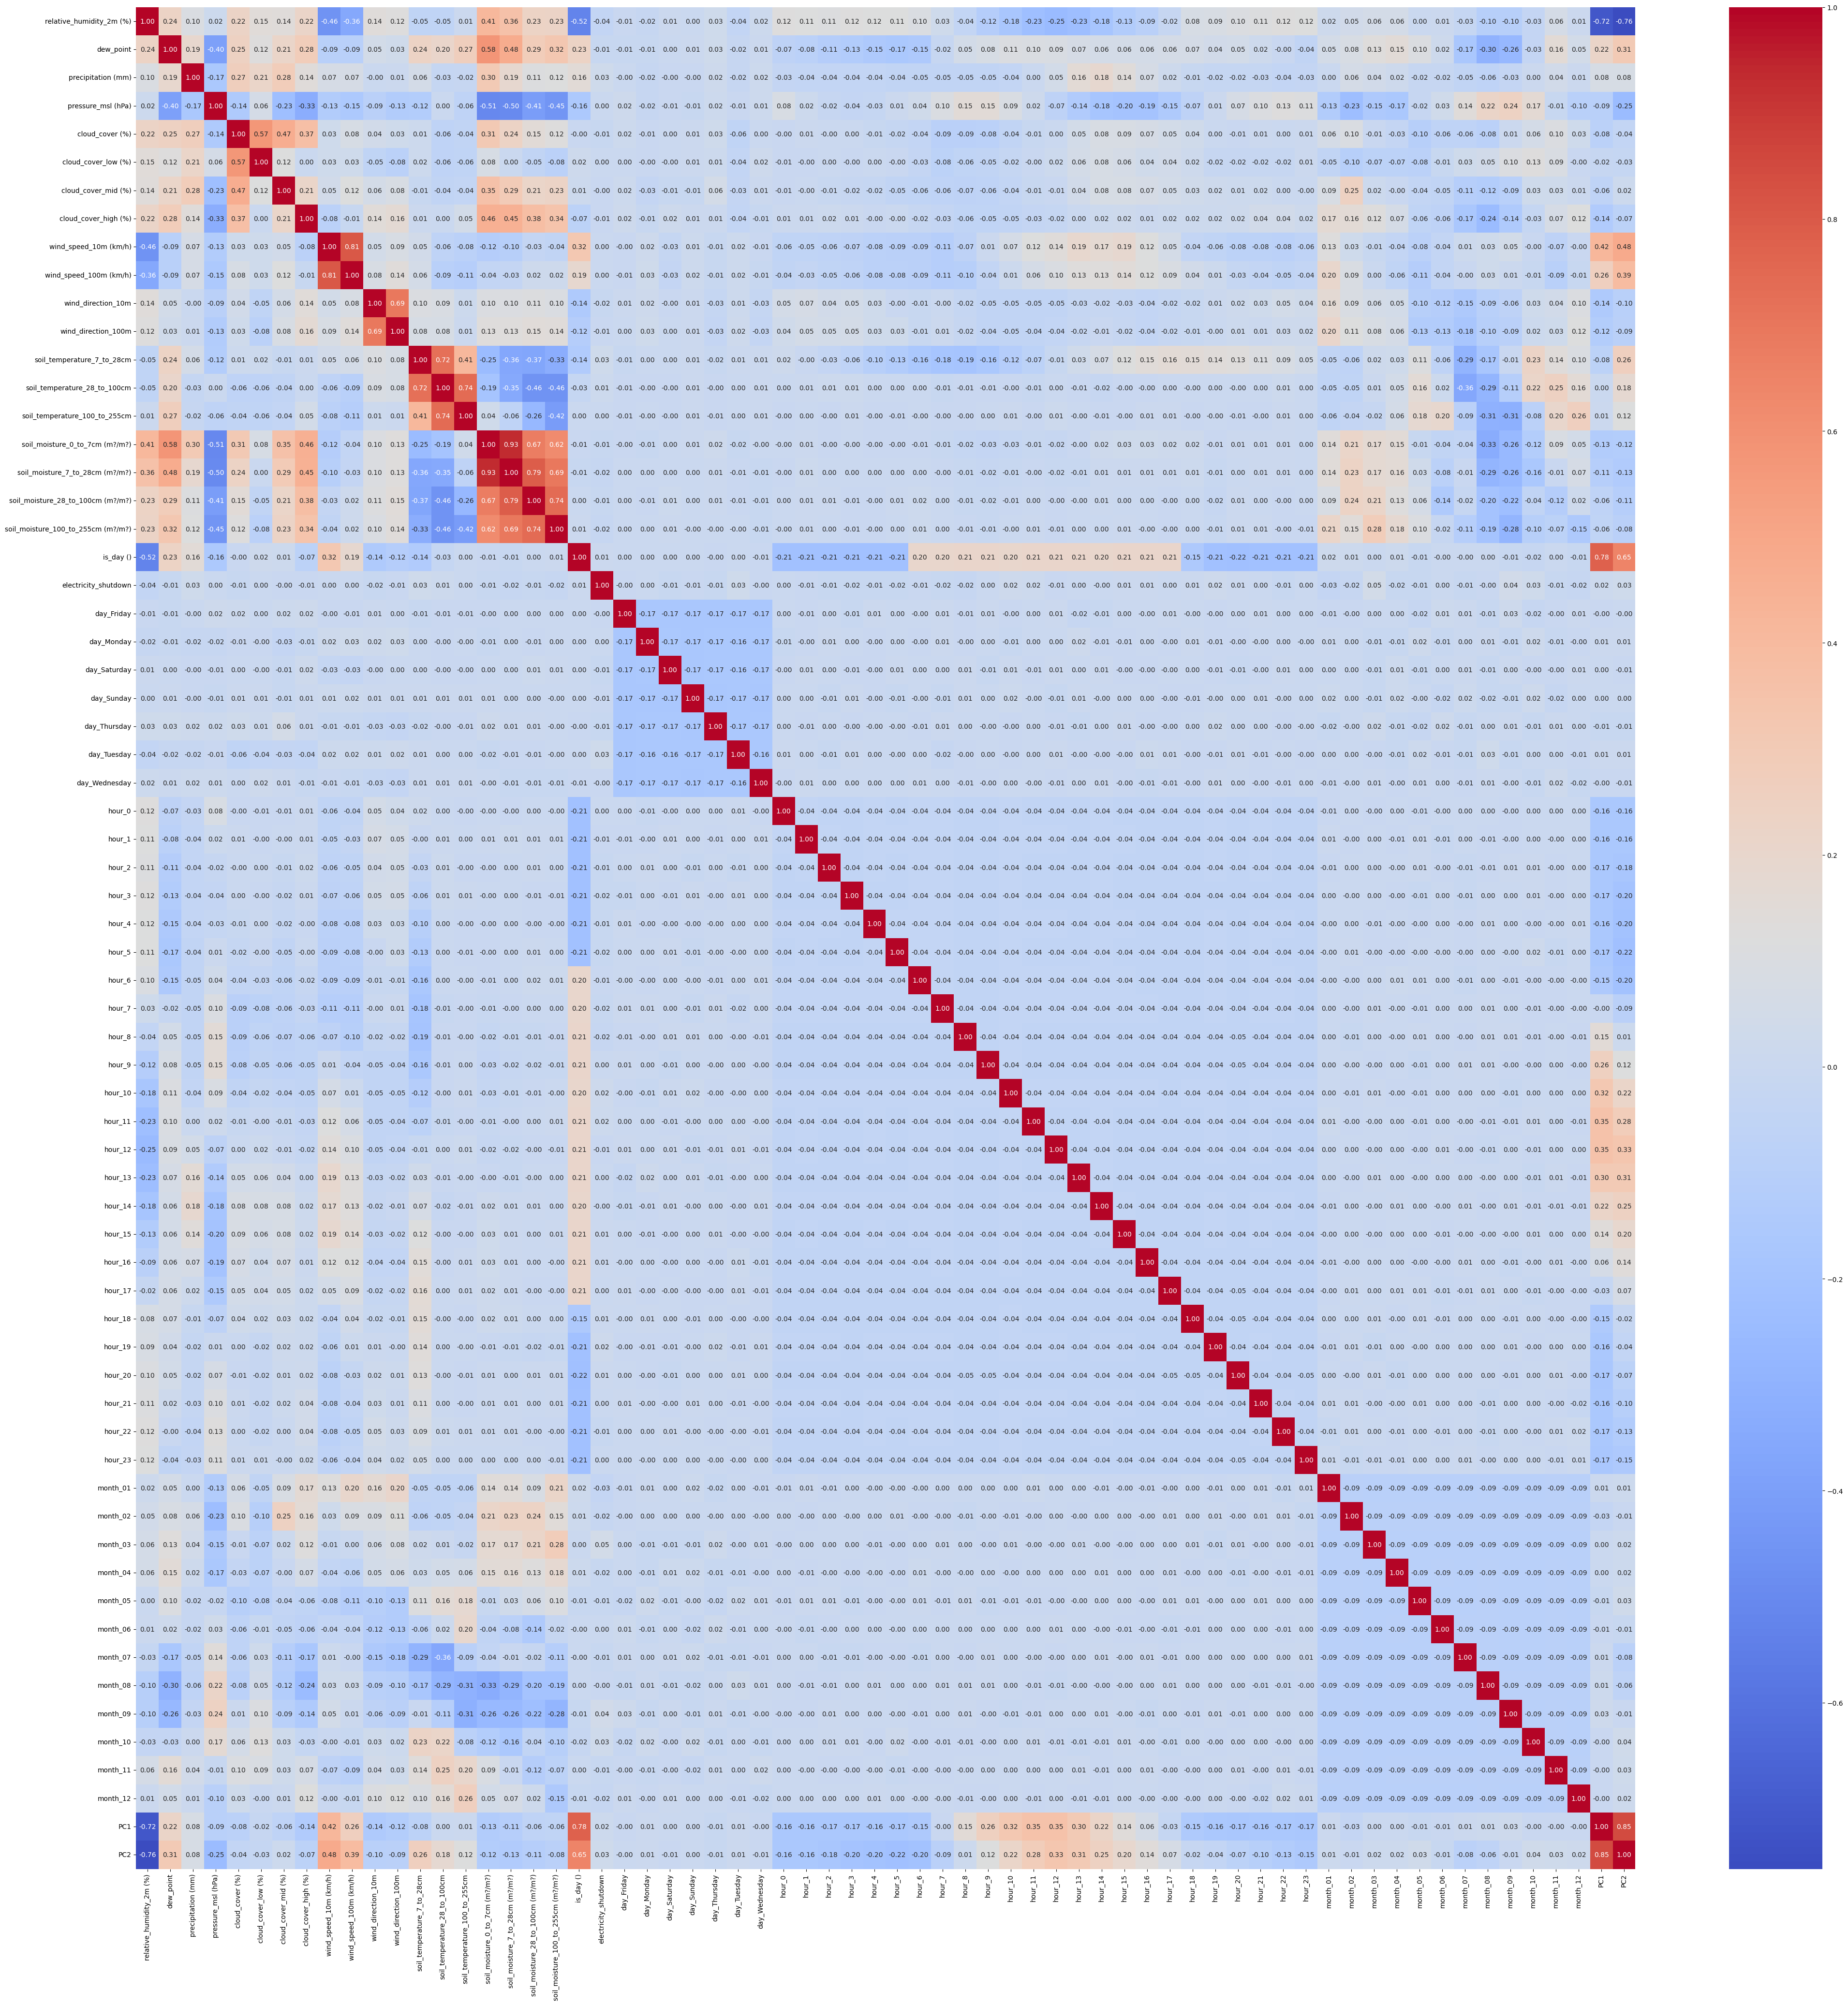

In [ ]:
#plot heatmap
import seaborn as sns
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()